## Car Price Prediction 

### Importing and Understanding Data

In [808]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [809]:
import pandas as pd
import numpy as np

In [810]:
# Importing dataset
carPriceDF = pd.read_csv('CarPrice_Assignment.csv')

In [811]:
carPriceDF.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [812]:
carPriceDF[['car company','car model']] = carPriceDF["CarName"].str.split(" ", 1, expand=True)

In [813]:
carPriceDF.head()



,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car company,car model
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [814]:
carPriceDF.replace({'drivewheel': '4wd'}, 'fwd',inplace=True)

In [815]:
carPriceDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 28 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

### Data Preparation

In [816]:
# List of variables to map

varlist =  ['doornumber','cylindernumber']

# Defining the map function
def binary_map(x):
    return x.map({'two': 2, "three": 3,"four":4,"five":5,"six":6,"eight":8,"twelve":12})

# Applying the function to the dataframe
carPriceDF[varlist] = carPriceDF[varlist].apply(binary_map)

In [817]:
carPriceDF.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car company,car model
0,1,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,audi 100ls,gas,std,4,sedan,fwd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


### Dummy Variables

The variables fuel type , aspiration , enginelocation,enginetype,fuelsystem,carbody and drive wheel have multiple levels. We need to convert these levels into integer as well. For this, we will use something called `dummy variables`.

In [818]:
# Get the dummy variables for the features one by one  and store it in a new variable 

dummy1 = pd.get_dummies(carPriceDF['fueltype'])
dummy2=pd.get_dummies(carPriceDF['aspiration'])
dummy3=pd.get_dummies(carPriceDF['enginelocation'])
dummy4=pd.get_dummies(carPriceDF['enginetype'])
dummy5=pd.get_dummies(carPriceDF['fuelsystem'])
dummy6=pd.get_dummies(carPriceDF['carbody'])
dummy7=pd.get_dummies(carPriceDF['drivewheel'])



Now,in general for n levels we need only n-1 dummy variables . So we will drop the first column of all the dummy dataframes and make a note of the dropped columns 

In [819]:
pd.get_dummies(carPriceDF['fueltype'], drop_first = True) # diesel dropped
pd.get_dummies(carPriceDF['aspiration'], drop_first = True) # std dropped
pd.get_dummies(carPriceDF['enginelocation'], drop_first = True)# fromt dropped
pd.get_dummies(carPriceDF['enginetype'], drop_first = True)# dohc dropped
pd.get_dummies(carPriceDF['fuelsystem'], drop_first = True)#1bbl dropped
pd.get_dummies(carPriceDF['carbody'], drop_first = True)# convertible dropped
pd.get_dummies(carPriceDF['drivewheel'], drop_first = True)# fwd dropped

,rwd
0,1
1,1
2,1
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [820]:

# Concatinating the dummy variables to the CarPriceDF dataframe 
carPriceDF=pd.concat([carPriceDF,dummy1,dummy2,dummy3,dummy4,dummy5,dummy6,dummy7],axis=1).reset_index()


In [821]:
#Dropping the columns for which dummy variables have been created 
carPriceDF.drop(['fueltype','aspiration','enginelocation','enginetype','fuelsystem','carbody','drivewheel'],axis=1,inplace=True)

In [822]:
# creating a dataframe consisting of car_ID and CarName and then dropping these variables from the dataframe 
carIDAndName=carPriceDF[['car_ID','CarName','car company','car model']]
carPriceDF.drop(['car_ID','CarName','car company','car model'],axis=1,inplace=True)

In [823]:
carPriceDF.head()

,index,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,...,mpfi,spdi,spfi,convertible,hardtop,hatchback,sedan,wagon,fwd,rwd
0,0,3,2,88.6,168.8,64.1,48.8,2548,4,130,...,1,0,0,1,0,0,0,0,0,1
1,1,3,2,88.6,168.8,64.1,48.8,2548,4,130,...,1,0,0,1,0,0,0,0,0,1
2,2,1,2,94.5,171.2,65.5,52.4,2823,6,152,...,1,0,0,0,0,1,0,0,0,1
3,3,2,4,99.8,176.6,66.2,54.3,2337,4,109,...,1,0,0,0,0,0,1,0,1,0
4,4,2,4,99.4,176.6,66.4,54.3,2824,5,136,...,1,0,0,0,0,0,1,0,1,0


### Imputing the outliers with median value 

In [824]:
#from scipy import stats
#import numpy as np
#def outlier_detect(df):
 #   for i in df.describe().columns:
  #      Q1=df.describe().at['25%',i]
   #     Q3=df.describe().at['75%',i]
    #    IQR=Q3 - Q1
     #   LTV=Q1 - 1.5 * IQR
      #  UTV=Q3 + 1.5 * IQR
       # x=np.array(df[i])
        #p=[]
        #for j in x:
         #   if j < LTV or j>UTV:
          #      p.append(df[i].median())
           # else:
            #    p.append(j)
        #df[i]=p
    #return df
#carPriceDF=outlier_detect(carPriceDF)

In [825]:
carPriceDF.head()

,index,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,...,mpfi,spdi,spfi,convertible,hardtop,hatchback,sedan,wagon,fwd,rwd
0,0,3,2,88.6,168.8,64.1,48.8,2548,4,130,...,1,0,0,1,0,0,0,0,0,1
1,1,3,2,88.6,168.8,64.1,48.8,2548,4,130,...,1,0,0,1,0,0,0,0,0,1
2,2,1,2,94.5,171.2,65.5,52.4,2823,6,152,...,1,0,0,0,0,1,0,0,0,1
3,3,2,4,99.8,176.6,66.2,54.3,2337,4,109,...,1,0,0,0,0,0,1,0,1,0
4,4,2,4,99.4,176.6,66.4,54.3,2824,5,136,...,1,0,0,0,0,0,1,0,1,0


## Splitting the Data into Training and Testing Sets

In [826]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(carPriceDF, train_size = 0.7, test_size = 0.3, random_state = 100)

In [827]:
df_train.head()

,index,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,...,mpfi,spdi,spfi,convertible,hardtop,hatchback,sedan,wagon,fwd,rwd
122,122,1,4,93.7,167.3,63.8,50.8,2191,4,98,...,0,0,0,0,0,0,1,0,1,0
125,125,3,2,94.5,168.9,68.3,50.2,2778,4,151,...,1,0,0,0,0,1,0,0,0,1
166,166,1,2,94.5,168.7,64.0,52.6,2300,4,98,...,1,0,0,0,0,1,0,0,0,1
1,1,3,2,88.6,168.8,64.1,48.8,2548,4,130,...,1,0,0,1,0,0,0,0,0,1
199,199,-1,4,104.3,188.8,67.2,57.5,3157,4,130,...,1,0,0,0,0,0,0,1,0,1


### Rescaling the Features 

We will use Standard Scaler.

In [828]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [1]:
num_vars=['symboling','doornumber','wheelbase','carlength','carwidth','carheight','curbweight','cylindernumber','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

NameError: name 'scaler' is not defined

### Dividing into X and Y sets for the model building

In [830]:
y_train = df_train.pop('price')
X_train = df_train

## Building our model

We will be using RFE followed by manually building the model 

### RFE
Recursive feature elimination

In [831]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [832]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [833]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('index', False, 33),
 ('symboling', False, 25),
 ('doornumber', False, 32),
 ('wheelbase', False, 24),
 ('carlength', False, 29),
 ('carwidth', True, 1),
 ('carheight', False, 21),
 ('curbweight', False, 15),
 ('cylindernumber', False, 2),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', False, 3),
 ('compressionratio', False, 9),
 ('horsepower', False, 4),
 ('peakrpm', False, 17),
 ('citympg', False, 34),
 ('highwaympg', False, 16),
 ('diesel', False, 8),
 ('gas', False, 6),
 ('std', False, 13),
 ('turbo', False, 22),
 ('front', True, 1),
 ('rear', True, 1),
 ('dohc', True, 1),
 ('dohcv', False, 11),
 ('l', True, 1),
 ('ohc', False, 12),
 ('ohcf', False, 18),
 ('ohcv', True, 1),
 ('rotor', False, 10),
 ('1bbl', False, 19),
 ('2bbl', False, 28),
 ('4bbl', False, 30),
 ('idi', False, 7),
 ('mfi', False, 36),
 ('mpfi', False, 31),
 ('spdi', False, 5),
 ('spfi', False, 35),
 ('convertible', True, 1),
 ('hardtop', False, 23),
 ('hatchback', False, 26),
 ('sedan', False, 27)

In [834]:
col = X_train.columns[rfe.support_]
col

Index(['carwidth', 'enginesize', 'boreratio', 'front', 'rear', 'dohc', 'l',
       'ohcv', 'convertible', 'fwd'],
      dtype='object')

In [835]:
X_train.columns[~rfe.support_]

Index(['index', 'symboling', 'doornumber', 'wheelbase', 'carlength',
       'carheight', 'curbweight', 'cylindernumber', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'diesel', 'gas', 'std', 'turbo', 'dohcv', 'ohc', 'ohcf', 'rotor',
       '1bbl', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi', 'hardtop',
       'hatchback', 'sedan', 'wagon', 'rwd'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [836]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [837]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [838]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [839]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     107.5
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           1.42e-56
Time:                        16:13:30   Log-Likelihood:                -51.841
No. Observations:                 143   AIC:                             123.7
Df Residuals:                     133   BIC:                             153.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.8337      0.130      6.390      

In [840]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [841]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,front,5.94
1,enginesize,4.33
0,carwidth,3.09
9,fwd,1.98
2,boreratio,1.85
7,ohcv,1.71
5,dohc,1.48
6,l,1.22
8,convertible,1.14
4,rear,1.12


front has a high vif value . let us drop it 

In [842]:
X_train_new = X_train_rfe.drop(['front'], axis=1)

#### Rebuilding the model

In [843]:
#adding a constant 
X_train_new = sm.add_constant(X_train_new)

In [844]:
lm = sm.OLS(y_train,X_train_new).fit()   # Running the linear model

In [845]:
print(lm.summary()) # print to see our new model

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     107.5
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           1.42e-56
Time:                        16:13:32   Log-Likelihood:                -51.841
No. Observations:                 143   AIC:                             123.7
Df Residuals:                     133   BIC:                             153.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4360      0.074      5.911      

In [846]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [847]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,4.33
0,carwidth,3.02
2,boreratio,1.78
6,ohcv,1.71
4,dohc,1.35
8,fwd,1.31
7,convertible,1.17
3,rear,1.12
5,l,1.12


## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [848]:
y_train_price = lm.predict(X_train_lm)

In [849]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

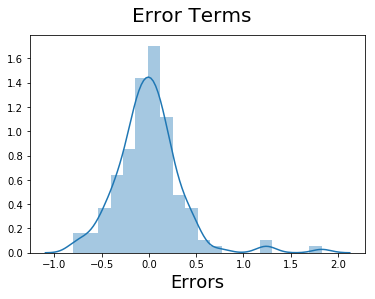

In [850]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)     

## Making Predictions

#### Applying the scaling on the test sets

In [851]:
num_vars=['symboling','doornumber','wheelbase','carlength','carwidth','carheight','curbweight','cylindernumber','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [852]:
y_test = df_test.pop('price')
X_test = df_test

In [853]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [854]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

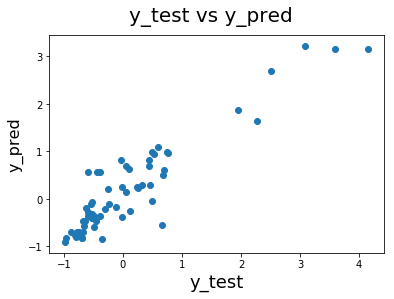

In [855]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [856]:
#Code Required as per instructions 
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8472747661051222